# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [84]:
import pandas as pd
import numpy as np
import math
import json
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
# % matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import  preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 1. 数据清洗

## 1.1 处理推送的信息

In [3]:
portfolio2 = portfolio
portfolio2["email"] = 0
portfolio2["mobile"] =  0
portfolio2["social"] = 0
portfolio2["web"] = 0
for i in range(portfolio2.shape[0]):
    if 'email'in portfolio2["channels"][i]:
        portfolio2["email"][i] = 1
    if 'mobile'in portfolio2["channels"][i]:
        portfolio2["mobile"][i] = 1
    if 'social'in portfolio2["channels"][i]:
        portfolio2["social"][i] = 1
    if 'web'in portfolio2["channels"][i]:
        portfolio2["web"][i] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWar

In [4]:
portfolio2 = portfolio2.sort_values(["offer_type","difficulty","reward","duration"])
portfolio2.drop("channels",axis=1)
portfolio2 = portfolio2[["id","offer_type","difficulty","reward","duration","email","mobile","social","web"]]
portfolio2.rename(columns={"id":"offer id"},inplace=True)

## 1.2 处理用户的信息

In [5]:
profile2 = profile
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [6]:
gender = pd.get_dummies(profile2['gender'],prefix="gender", prefix_sep='_', dummy_na = True)

In [7]:
profile2 = pd.concat([profile2,gender],axis=1)

In [8]:
# profile2 = profile.dropna()
profile2.rename(columns={"id":"person"},inplace=True)

In [9]:
profile2.drop("gender",axis=1,inplace=True)

## 1.3 处理用户收到推送的信息

In [10]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [11]:
value_list = transcript["value"].values.tolist()
value_df = pd.DataFrame(value_list)
transcript2 = pd.concat([transcript,value_df],axis=1)

In [12]:
transcript2["offer id"] = np.where(transcript2["offer_id"].notnull(),transcript2["offer_id"] ,transcript2["offer id"])
transcript2 = transcript2.drop(["offer_id","value"],axis=1)

In [13]:
transcript2 = transcript2[["event","person","time","offer id","amount","reward"]]
transcript2.head()

,event,person,time,offer id,amount,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


## 1.4 数据合并

把用户和推送的信息合并

In [14]:
tran_person = transcript2.merge(profile2,how='outer',on=["person"])

In [15]:
tran_person_prof = tran_person.merge(portfolio2,how='outer',on=["offer id"])
tran_person_prof

,event,person,time,offer id,amount,reward_x,age,became_member_on,income,gender_F,...,gender_O,gender_nan,offer_type,difficulty,reward_y,duration,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,75,20170509,100000.0,1,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,75,20170509,100000.0,1,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,75,20170509,100000.0,1,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
3,offer received,e2127556f4f64592b11af22de27a7932,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,68,20180426,70000.0,0,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
4,offer viewed,e2127556f4f64592b11af22de27a7932,420,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,68,20180426,70000.0,0,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
5,offer completed,e2127556f4f64592b11af22de27a7932,522,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,68,20180426,70000.0,0,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
6,offer received,68617ca6246f4fbc85e91a2a49552598,504,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,118,20171002,NaN,0,...,0,1,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
7,offer viewed,68617ca6246f4fbc85e91a2a49552598,648,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,118,20171002,NaN,0,...,0,1,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
8,offer received,389bc3fa690240e798340f5a15918d5c,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,65,20180209,53000.0,0,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
9,offer viewed,389bc3fa690240e798340f5a15918d5c,192,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,65,20180209,53000.0,0,...,0,0,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0


In [16]:
tran_person_prof2 = tran_person_prof.sort_values(["person","time","offer id"])
tran_person_prof2

,event,person,time,offer id,amount,reward_x,age,became_member_on,income,gender_F,...,gender_O,gender_nan,offer_type,difficulty,reward_y,duration,email,mobile,social,web
168280,offer received,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,33,20170421,72000.0,0,...,0,0,informational,0.0,0.0,3.0,1.0,1.0,1.0,0.0
168281,offer viewed,0009655768c64bdeb2e877511632db8f,192,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,33,20170421,72000.0,0,...,0,0,informational,0.0,0.0,3.0,1.0,1.0,1.0,0.0
145192,transaction,0009655768c64bdeb2e877511632db8f,228,NaN,22.16,NaN,33,20170421,72000.0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231161,offer received,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,NaN,NaN,33,20170421,72000.0,0,...,0,0,informational,0.0,0.0,4.0,1.0,1.0,0.0,1.0
231162,offer viewed,0009655768c64bdeb2e877511632db8f,372,3f207df678b143eea3cee63160fa8bed,NaN,NaN,33,20170421,72000.0,0,...,0,0,informational,0.0,0.0,4.0,1.0,1.0,0.0,1.0
205172,offer received,0009655768c64bdeb2e877511632db8f,408,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,33,20170421,72000.0,0,...,0,0,bogo,5.0,5.0,5.0,1.0,1.0,1.0,1.0
205173,offer completed,0009655768c64bdeb2e877511632db8f,414,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,33,20170421,72000.0,0,...,0,0,bogo,5.0,5.0,5.0,1.0,1.0,1.0,1.0
145193,transaction,0009655768c64bdeb2e877511632db8f,414,NaN,8.57,NaN,33,20170421,72000.0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205174,offer viewed,0009655768c64bdeb2e877511632db8f,456,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,33,20170421,72000.0,0,...,0,0,bogo,5.0,5.0,5.0,1.0,1.0,1.0,1.0
266540,offer received,0009655768c64bdeb2e877511632db8f,504,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,33,20170421,72000.0,0,...,0,0,discount,10.0,2.0,10.0,1.0,1.0,1.0,1.0


# 2. 探索数据

In [17]:
#多少人没有profile信息
tran_person_prof["became_member_on"].isna().sum()

0

In [18]:
tran_person_prof["person"].unique().shape

(17000,)

In [19]:
profile2.shape

(17000, 8)

In [20]:
#多少人看过推送信息
person_viewed = tran_person_prof[tran_person_prof.event=="offer viewed"]["person"].unique()
person_viewed.shape

(16834,)

In [21]:
#不看推送的人中有多少没有profile信息的
tran_person_prof[~tran_person_prof["person"].isin(person_viewed)]["became_member_on"].isna().sum()

0

In [22]:
#多少人没看过推送信息
person_not_viewed = tran_person_prof[~tran_person_prof["person"].isin(person_viewed)]["person"].unique()
person_not_viewed.shape

(166,)

In [23]:
#多少人看过也买了的
person_buyed = tran_person_prof[(tran_person_prof["person"].isin(person_viewed))& (tran_person_prof["event"]=="transaction")]["person"].unique()
person_buyed.shape

(16422,)

In [24]:
#多少人看过不买的
person_not_buy = np.setdiff1d(person_viewed, person_buyed, assume_unique=True)
person_not_buy.shape

(412,)

In [25]:
tran_person_prof["person_type"] = np.where(tran_person_prof["person"].isin(person_buyed),3,
                                          np.where(tran_person_prof["person"].isin(person_not_buy),2,1)) #看过买

# 3. 用户分类模型

## 3.1 模型数据准备
把推送数量和收到的数量变成特征

In [26]:
person_received_cnt = tran_person_prof[tran_person_prof["event"]=="offer received"].groupby("person").count()
person_viewed_cnt = tran_person_prof[tran_person_prof["event"]=="offer viewed"].groupby("person").count()

In [27]:
person_received_cnt=pd.DataFrame(person_received_cnt["event"])
person_received_cnt.rename(columns={"event":"count"},inplace=True)
# person_received_cnt["person"]=person_received_cnt.index

In [28]:
person_viewed_cnt=pd.DataFrame(person_viewed_cnt["event"])
person_viewed_cnt.rename(columns={"event":"count"},inplace=True)
# person_viewed_cnt["person"]=person_viewed_cnt.index

In [29]:
np.sum(person_viewed_cnt["count"])

57725

In [30]:
np.sum(person_received_cnt["count"])

76277

**区分三个人群类别：**

* 第一类：没看推送
* 第二类：看了推送没购买
* 第三类：看了推送且购买

In [31]:
person_not_viewed_df = pd.DataFrame(person_not_viewed, columns=["person"])
person_not_viewed_df["person_type"] = 1
print(person_not_viewed_df.shape)
person_not_buy_df = pd.DataFrame(person_not_buy, columns=["person"])
person_not_buy_df["person_type"] = 2
print(person_not_buy_df.shape)
person_buyed_df = pd.DataFrame(person_buyed, columns=["person"])
person_buyed_df["person_type"] = 3
print(person_buyed_df.shape)

(166, 2)
(412, 2)
(16422, 2)


把所有推送数据和用户信息合并

In [32]:
whole_person = pd.concat([person_buyed_df,person_not_buy_df,person_not_viewed_df],axis=0)
whole_person.head()

,person,person_type
0,78afa995795e4d85b5d9ceeca43f5fef,3
1,a03223e636434f42ac4c3df47e8bac43,3
2,e2127556f4f64592b11af22de27a7932,3
3,68617ca6246f4fbc85e91a2a49552598,3
4,389bc3fa690240e798340f5a15918d5c,3


In [33]:
whole_person = whole_person.merge(person_received_cnt,how="outer",on=["person"])

In [34]:
whole_person = whole_person.merge(person_viewed_cnt,how="outer",on=["person"])

In [35]:
whole_person.rename(columns={"count_x":"r_cnt","count_y":"v_cnt"},inplace=True)
whole_person.head()

,person,person_type,r_cnt,v_cnt
0,78afa995795e4d85b5d9ceeca43f5fef,3,4.0,4.0
1,a03223e636434f42ac4c3df47e8bac43,3,5.0,3.0
2,e2127556f4f64592b11af22de27a7932,3,4.0,3.0
3,68617ca6246f4fbc85e91a2a49552598,3,5.0,4.0
4,389bc3fa690240e798340f5a15918d5c,3,6.0,6.0


In [36]:
whole_person = whole_person.merge(profile2,how="outer",on=["person"])

In [37]:
whole_person.isna().sum()

person                 0
person_type            0
r_cnt                  6
v_cnt                166
age                    0
became_member_on       0
income              2175
gender_F               0
gender_M               0
gender_O               0
gender_nan             0
dtype: int64

In [38]:
whole_person["r_cnt"] = np.where(whole_person["r_cnt"].isna(),0,whole_person["r_cnt"])
whole_person["v_cnt"] = np.where(whole_person["v_cnt"].isna(),0,whole_person["v_cnt"])
whole_person["income"] = np.where(whole_person["income"].isna(),0,whole_person["income"])

In [39]:
whole_person.groupby("person_type").count()

,person,r_cnt,v_cnt,age,became_member_on,income,gender_F,gender_M,gender_O,gender_nan
person_type,,,,,,,,,,
1,166,166,166,166,166,166,166,166,166,166
2,412,412,412,412,412,412,412,412,412,412
3,16422,16422,16422,16422,16422,16422,16422,16422,16422,16422


## 3.2 Bagging分类模型

准备分类的训练数据和测试数据

In [40]:
X = whole_person[["r_cnt","v_cnt","age","became_member_on","gender_F","gender_M","gender_O","gender_nan","income"]]
y = whole_person["person_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42) #42是随机种子

In [41]:
model_bag = BaggingClassifier(DecisionTreeClassifier(),max_samples=200,n_estimators = 200)
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [42]:
preds = model_bag.predict(X_test)

In [43]:
print('Accuracy score: ', format(accuracy_score(y_test, preds)))
print('Precision score: ', format(precision_score(y_test, preds,average="micro")))
print('Recall score: ', format(recall_score(y_test, preds,average="micro")))
print('F1 score: ', format(f1_score(y_test, preds,average="micro")))

Accuracy score:  0.9735294117647059
Precision score:  0.9735294117647059
Recall score:  0.9735294117647059
F1 score:  0.9735294117647059


## 3.3 随机森林分类模型

由于Bagging模型不太好解释，所以用随机森林来看哪个特征对于结果的影响最大

In [44]:
model_forest = RandomForestClassifier(n_estimators = 50)
model_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
preds = model_forest.predict(X_test)

In [46]:
print('Accuracy score: ', format(accuracy_score(y_test, preds)))
print('Precision score: ', format(precision_score(y_test, preds,average="micro")))
print('Recall score: ', format(recall_score(y_test, preds,average="micro")))
print('F1 score: ', format(f1_score(y_test, preds,average="micro")))

Accuracy score:  0.97
Precision score:  0.97
Recall score:  0.97
F1 score:  0.97


**看下哪个特征对于分类影响最大**

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


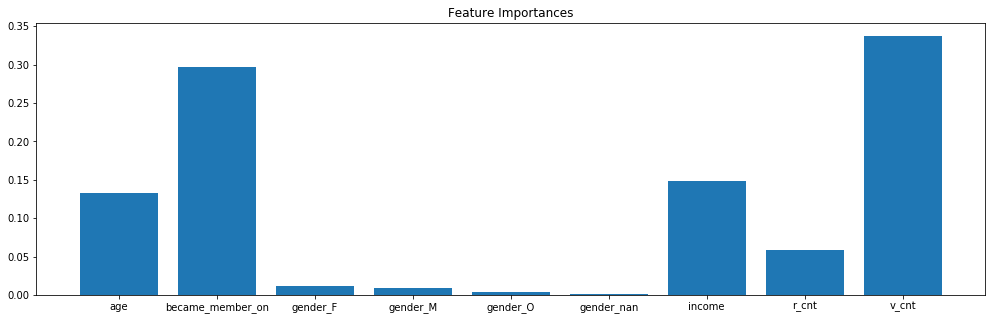

In [47]:
f, ax = plt.subplots(figsize=(17, 5))
ax.bar(["r_cnt","v_cnt","age","became_member_on","gender_F","gender_M","gender_O","gender_nan","income"],model_forest.feature_importances_)
ax.set_title("Feature Importances")
f.show()

## 3.4 三个人群类别的特征分布

In [48]:
person_all = whole_person[["person_type","r_cnt","v_cnt","age","became_member_on","gender_F","gender_M","gender_O","gender_nan","income"]]
person_1 = person_all[person_all.person_type == 1]
person_2 = person_all[person_all.person_type == 2]
person_3 = person_all[person_all.person_type == 3]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2ddb4b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2dc237f0>]], dtype=object)

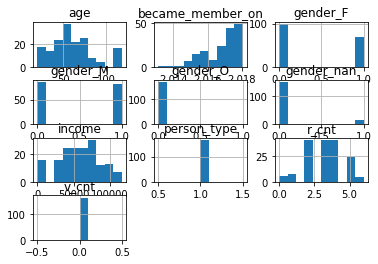

In [49]:
person_1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2dd4d828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2da2cda0>]], dtype=object)

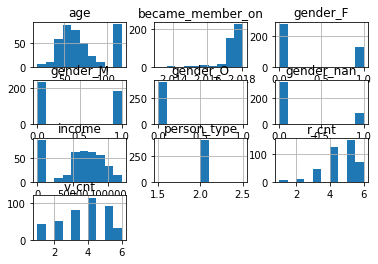

In [50]:
person_2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2da85550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2d81cba8>]], dtype=object)

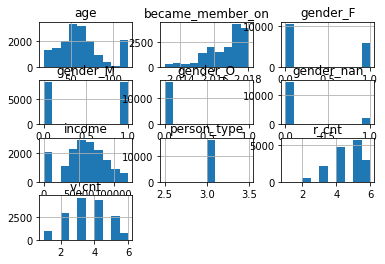

In [51]:
person_3.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2d7d5860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2d620eb8>]], dtype=object)

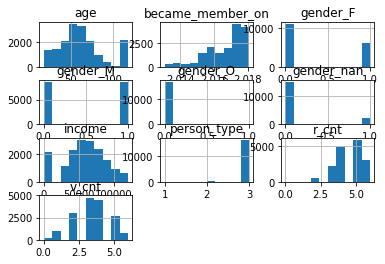

In [52]:
person_all.hist()

通过模型的结果和观察数据的分布比较，可以得出以下结论：

**1. 注册为会员时间的影响：**

    类型1不看推送：按照用户新旧程度购买人数依次上升
    类型2看了不买：分布明显集中在新注册用户
    类型3看了且购买：按照用户新旧程度购买人数依次上升
    
    结论：注册会员时间对于分类2有显著影响

**2. 收到推送的数量的影响：**

收到推送对于是否看过推送和购买产品有显著影响，后两类人群收到推送的数量明显集中在5次左右，而第一类人群，收到推送的数量在3次左右。

**3. 年龄、性别和收入的3个分布对于是否三个类别并没有显示区别**

# 4. 购买量模型

对于类别3（看了推送且购买了的人群），哪个因素对于购买金额有最大的影响

## 4.1 数据准备

In [53]:
person_buy_tran = tran_person_prof[tran_person_prof["person"].isin(person_buyed)]

In [54]:
person_received_cnt2 = person_buy_tran[person_buy_tran["event"]=="offer received"].groupby(["person","offer id"]).count()
person_viewed_cnt2 = person_buy_tran[person_buy_tran["event"]=="offer viewed"].groupby(["person","offer id"]).count()

person_received_cnt2=pd.DataFrame(person_received_cnt2["event"])
person_received_cnt2.rename(columns={"event":"r_cnt"},inplace=True)
person_received_cnt2["offer id"] = pd.DataFrame(person_received_cnt2.index.tolist())[1].values

In [55]:
person_viewed_cnt2=pd.DataFrame(person_viewed_cnt2["event"])
person_viewed_cnt2.rename(columns={"event":"v_cnt"},inplace=True)
person_viewed_cnt2["offer id"] = pd.DataFrame(person_viewed_cnt2.index.tolist())[1].values

In [56]:
person_amount = pd.DataFrame(person_buy_tran.groupby(["person"]).sum()["amount"])

In [57]:
buy_list = person_buyed_df.merge(person_received_cnt2,how="outer",on="person")

In [58]:
buy_list = buy_list.merge(person_viewed_cnt2,how="outer",on=["person","offer id"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'offer id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [146]:
buy_list2 = buy_list.pivot(index="person",columns="offer id", values=["v_cnt","r_cnt"])

In [147]:
col_names = []
for i in range(20):
    a = np.asarray(buy_list2.columns[i])
    col_names.append(a[0]+"_"+a[1])

In [148]:
buy_list2.columns = col_names
buy_list2.head()

,v_cnt_0b1e1539f2cc45b7b9fa7c272da2e1d7,v_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,v_cnt_2906b810c7d4411798c6938adc9daaa5,v_cnt_3f207df678b143eea3cee63160fa8bed,v_cnt_4d5c57ea9a6940dd891ad53e9dbe8da0,v_cnt_5a8bc65990b245e5a138643cd4eb9837,v_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,v_cnt_ae264e3637204a6fb9bb56bc8210ddfd,v_cnt_f19421c1d4aa40978ebb69ca19b0e20d,v_cnt_fafdcd668e3743c1bb461111dcafc2a4,r_cnt_0b1e1539f2cc45b7b9fa7c272da2e1d7,r_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,r_cnt_2906b810c7d4411798c6938adc9daaa5,r_cnt_3f207df678b143eea3cee63160fa8bed,r_cnt_4d5c57ea9a6940dd891ad53e9dbe8da0,r_cnt_5a8bc65990b245e5a138643cd4eb9837,r_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,r_cnt_ae264e3637204a6fb9bb56bc8210ddfd,r_cnt_f19421c1d4aa40978ebb69ca19b0e20d,r_cnt_fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0
00116118485d4dfda04fdbaba9a87b5c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
0020c2b971eb4e9188eac86d93036a77,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.0
0020ccbbb6d84e358d3414a3ff76cffd,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN


In [149]:
buy_list2 = buy_list2.merge(profile2,how="outer",on="person")
buy_list2 = buy_list2.merge(person_amount,how="outer",on="person")

In [150]:
for col in buy_list2.columns:
    if col[2:5] == 'cnt':
        buy_list2[col] = np.where(buy_list2[col].isna(),0,buy_list2[col])

In [151]:
buy_list2["income"] = np.where(buy_list2["income"].isna(),0,buy_list2["income"])
buy_list2["amount"] = np.where(buy_list2["amount"].isna(),0,buy_list2["amount"])

In [152]:
buy_list2.drop(["gender_F","gender_M","gender_O","gender_nan"],axis=1,inplace=True)

In [153]:
buy_list3 = buy_list2.copy()

In [67]:
v_max = buy_list["v_cnt"].max()
v_min = 0
r_max = buy_list["r_cnt"].max()
r_min = 0

In [68]:
for col in buy_list3.columns:
    if col[0:5] == 'v_cnt':
        buy_list3[col] = buy_list3[col].transform(lambda x: (x - v_min) / (v_max - v_min)) 
    if col[0:5] == 'r_cnt':
        buy_list3[col] = buy_list3[col].transform(lambda x: (x - r_min) / (r_max - r_min))   

In [69]:
buy_list3["age"] = buy_list3["age"].transform(lambda x: (x - x.min()) / (x.max() - x.min())) 
buy_list3["became_member_on"] = buy_list3["became_member_on"].transform(lambda x: (x - x.min()) / (x.max() - x.min())) 
buy_list3["income"] = buy_list3["income"].transform(lambda x: (x - x.min()) / (x.max() - x.min())) 

In [70]:
buy_list3.head()

,person,v_cnt_0b1e1539f2cc45b7b9fa7c272da2e1d7,v_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,v_cnt_2906b810c7d4411798c6938adc9daaa5,v_cnt_3f207df678b143eea3cee63160fa8bed,v_cnt_4d5c57ea9a6940dd891ad53e9dbe8da0,v_cnt_5a8bc65990b245e5a138643cd4eb9837,v_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,v_cnt_ae264e3637204a6fb9bb56bc8210ddfd,v_cnt_f19421c1d4aa40978ebb69ca19b0e20d,...,r_cnt_4d5c57ea9a6940dd891ad53e9dbe8da0,r_cnt_5a8bc65990b245e5a138643cd4eb9837,r_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,r_cnt_ae264e3637204a6fb9bb56bc8210ddfd,r_cnt_f19421c1d4aa40978ebb69ca19b0e20d,r_cnt_fafdcd668e3743c1bb461111dcafc2a4,age,became_member_on,income,amount
0,0009655768c64bdeb2e877511632db8f,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.2,0.2,0.15,0.793888,0.600,127.60
1,00116118485d4dfda04fdbaba9a87b5c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.4,0.0,1.00,0.993980,0.000,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,0.2,0.2,0.0,0.2,0.0,0.2,0.2,0.0,0.0,...,0.0,0.2,0.2,0.0,0.0,0.0,0.22,0.987659,0.475,79.46
3,0020c2b971eb4e9188eac86d93036a77,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,...,0.2,0.2,0.0,0.2,0.0,0.4,0.41,0.591535,0.750,196.86
4,0020ccbbb6d84e358d3414a3ff76cffd,0.0,0.2,0.0,0.0,0.0,0.2,0.2,0.0,0.2,...,0.0,0.2,0.2,0.0,0.2,0.0,0.06,0.607676,0.500,154.05


## 4.2 购买量线性模型

In [71]:
X = buy_list3.drop(["person","amount"],axis=1)
y = buy_list3["amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42) #42是随机种子

In [72]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
lr_model.coef_.shape

(23,)

In [74]:
a = pd.DataFrame(index = range(0,27),columns=["coef","value"])
j = 0
for i in lr_model.coef_:
    a["coef"][j] = X.columns[j]
    a["value"][j] = round(i,1)
    j+=1    

In [75]:
a

,coef,value
0,v_cnt_0b1e1539f2cc45b7b9fa7c272da2e1d7,125.2
1,v_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,83.6
2,v_cnt_2906b810c7d4411798c6938adc9daaa5,124.4
3,v_cnt_3f207df678b143eea3cee63160fa8bed,68.9
4,v_cnt_4d5c57ea9a6940dd891ad53e9dbe8da0,91.2
5,v_cnt_5a8bc65990b245e5a138643cd4eb9837,50.7
6,v_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,106
7,v_cnt_ae264e3637204a6fb9bb56bc8210ddfd,60.9
8,v_cnt_f19421c1d4aa40978ebb69ca19b0e20d,44.2
9,v_cnt_fafdcd668e3743c1bb461111dcafc2a4,148.2


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


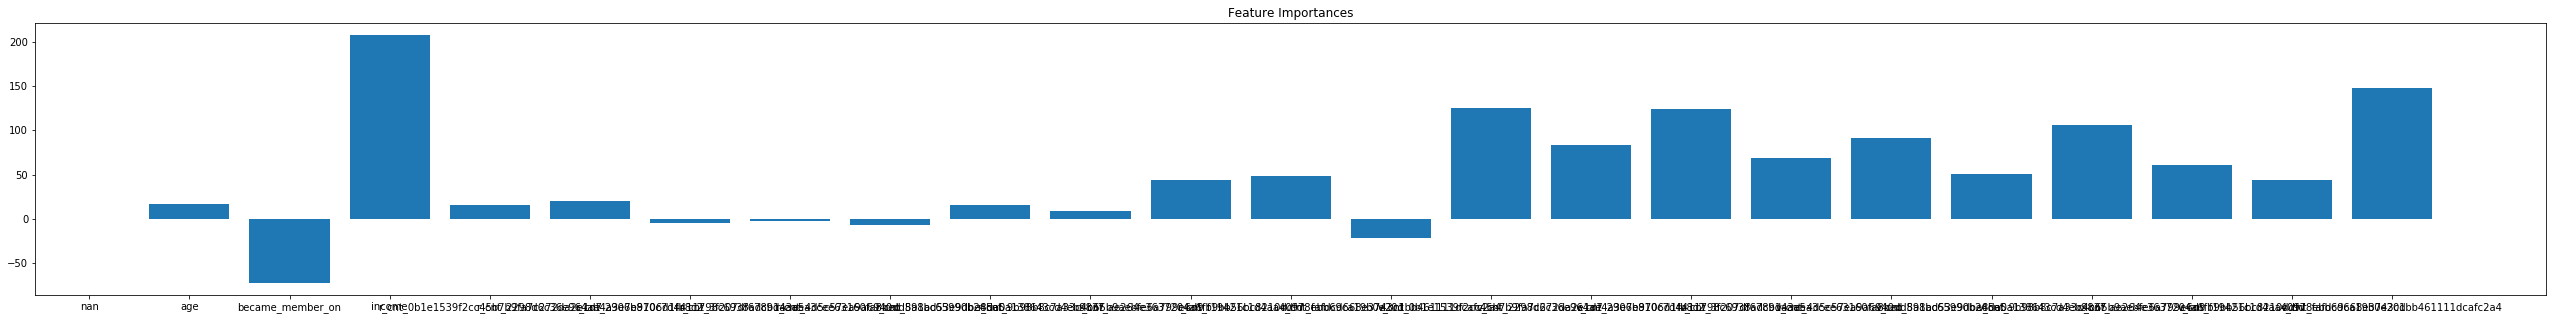

In [76]:
f, ax = plt.subplots(figsize=(45, 5))
ax.bar(a["coef"],a["value"])
ax.set_title("Feature Importances")
f.show()

In [77]:
preds = lr_model.predict(X_test)

In [78]:
print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

12600.0026193
0.222722708177


## 4.3 购买量神经网络模型

由于线性回归模型的误差太大，试下神经网络是否能够提高预测准确率

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [80]:
model = Sequential()
model.add(Dense(18, activation="relu",input_dim=23))
model.add(Dense(13))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(7))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("relu"))
model.summary()

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                432       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                247       
_________________________________________________________________
activation_1 (Activation)    (None, 13)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
_________________________________________________________________
activation_3 (Activation)    (None, 7)                 0         
__________

In [81]:
# Fitting the model
history = model.fit(np.asarray(X_train), np.asarray(y_train), epochs=300, 
                    validation_data=(np.asarray(X_test), np.asarray(y_test)),
                    verbose=2)

Train on 11900 samples, validate on 5100 samples
Epoch 1/300
 - 1s - loss: 19548.8596 - acc: 0.0024 - val_loss: 15432.0171 - val_acc: 0.0000e+00
Epoch 2/300
 - 1s - loss: 14300.2448 - acc: 0.0000e+00 - val_loss: 14036.5471 - val_acc: 0.0000e+00
Epoch 3/300
 - 0s - loss: 12868.6720 - acc: 0.0019 - val_loss: 12799.1497 - val_acc: 0.0075
Epoch 4/300
 - 0s - loss: 12173.4092 - acc: 0.0024 - val_loss: 12547.9981 - val_acc: 0.0000e+00
Epoch 5/300
 - 0s - loss: 12043.2623 - acc: 1.6807e-04 - val_loss: 12539.9238 - val_acc: 1.9608e-04
Epoch 6/300
 - 0s - loss: 11992.3930 - acc: 8.4034e-05 - val_loss: 12469.1909 - val_acc: 1.9608e-04
Epoch 7/300
 - 0s - loss: 11951.6392 - acc: 0.0000e+00 - val_loss: 12507.0555 - val_acc: 3.9216e-04
Epoch 8/300
 - 0s - loss: 11918.8489 - acc: 0.0000e+00 - val_loss: 12419.3439 - val_acc: 0.0000e+00
Epoch 9/300
 - 0s - loss: 11889.6229 - acc: 8.4034e-05 - val_loss: 12412.3509 - val_acc: 1.9608e-04
Epoch 10/300
 - 0s - loss: 11848.8553 - acc: 0.0000e+00 - val_loss:

Epoch 82/300
 - 0s - loss: 11153.4125 - acc: 8.4034e-05 - val_loss: 11781.8764 - val_acc: 1.9608e-04
Epoch 83/300
 - 0s - loss: 11160.8102 - acc: 0.0000e+00 - val_loss: 11774.1283 - val_acc: 0.0000e+00
Epoch 84/300
 - 0s - loss: 11176.9434 - acc: 1.6807e-04 - val_loss: 11796.4312 - val_acc: 1.9608e-04
Epoch 85/300
 - 0s - loss: 11163.9317 - acc: 0.0000e+00 - val_loss: 11847.5845 - val_acc: 1.9608e-04
Epoch 86/300
 - 0s - loss: 11160.4745 - acc: 2.5210e-04 - val_loss: 11991.5383 - val_acc: 1.9608e-04
Epoch 87/300
 - 0s - loss: 11158.8417 - acc: 0.0000e+00 - val_loss: 11771.7988 - val_acc: 1.9608e-04
Epoch 88/300
 - 0s - loss: 11146.9791 - acc: 0.0000e+00 - val_loss: 11806.7174 - val_acc: 0.0000e+00
Epoch 89/300
 - 0s - loss: 11136.3951 - acc: 0.0000e+00 - val_loss: 11756.1472 - val_acc: 0.0000e+00
Epoch 90/300
 - 0s - loss: 11135.0517 - acc: 1.6807e-04 - val_loss: 11767.5489 - val_acc: 0.0000e+00
Epoch 91/300
 - 0s - loss: 11149.7266 - acc: 1.6807e-04 - val_loss: 11824.1044 - val_acc: 0

Epoch 165/300
 - 0s - loss: 11075.0208 - acc: 0.0056 - val_loss: 11859.5664 - val_acc: 0.0069
Epoch 166/300
 - 0s - loss: 11075.3178 - acc: 0.0055 - val_loss: 11926.4663 - val_acc: 0.0094
Epoch 167/300
 - 0s - loss: 11053.6939 - acc: 0.0050 - val_loss: 12155.4572 - val_acc: 0.0110
Epoch 168/300
 - 0s - loss: 11082.7803 - acc: 0.0053 - val_loss: 11838.4760 - val_acc: 0.0080
Epoch 169/300
 - 1s - loss: 11078.8986 - acc: 0.0052 - val_loss: 11815.1720 - val_acc: 0.0063
Epoch 170/300
 - 0s - loss: 11067.7801 - acc: 0.0058 - val_loss: 11795.4240 - val_acc: 0.0082
Epoch 171/300
 - 0s - loss: 11065.7656 - acc: 0.0065 - val_loss: 11821.0976 - val_acc: 0.0076
Epoch 172/300
 - 0s - loss: 11048.9774 - acc: 0.0071 - val_loss: 11833.5428 - val_acc: 0.0073
Epoch 173/300
 - 0s - loss: 11045.0891 - acc: 0.0070 - val_loss: 11826.2564 - val_acc: 0.0076
Epoch 174/300
 - 0s - loss: 11049.3884 - acc: 0.0061 - val_loss: 11873.5419 - val_acc: 0.0075
Epoch 175/300
 - 0s - loss: 11061.6052 - acc: 0.0061 - val_l

Epoch 253/300
 - 0s - loss: 11016.3532 - acc: 0.0129 - val_loss: 11993.4130 - val_acc: 0.0122
Epoch 254/300
 - 0s - loss: 10996.2168 - acc: 0.0137 - val_loss: 12062.5005 - val_acc: 0.0163
Epoch 255/300
 - 0s - loss: 10988.5841 - acc: 0.0140 - val_loss: 11991.1495 - val_acc: 0.0169
Epoch 256/300
 - 0s - loss: 10996.8578 - acc: 0.0137 - val_loss: 12105.9987 - val_acc: 0.0178
Epoch 257/300
 - 0s - loss: 10995.1686 - acc: 0.0143 - val_loss: 12011.1941 - val_acc: 0.0165
Epoch 258/300
 - 0s - loss: 11026.3157 - acc: 0.0134 - val_loss: 12435.0425 - val_acc: 0.0204
Epoch 259/300
 - 0s - loss: 11006.6750 - acc: 0.0139 - val_loss: 12190.5138 - val_acc: 0.0178
Epoch 260/300
 - 0s - loss: 11019.2084 - acc: 0.0140 - val_loss: 12022.4208 - val_acc: 0.0175
Epoch 261/300
 - 0s - loss: 10943.2720 - acc: 0.0145 - val_loss: 12091.3395 - val_acc: 0.0161
Epoch 262/300
 - 0s - loss: 11003.6859 - acc: 0.0132 - val_loss: 11974.6503 - val_acc: 0.0176
Epoch 263/300
 - 0s - loss: 10971.6528 - acc: 0.0136 - val_l

In [82]:
# Scoring the model
score =model.evaluate(np.asarray(X_test), np.asarray(y_test))
print("\nAccuracy: ", score[-1])

5100/5100 [==============================] - 0s 18us/step

Accuracy:  0.029019607849


In [83]:
preds = model.predict_proba(np.asarray(X_test))
print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

5100/5100 [==============================] - 0s 15us/step
12160.2451958
0.249850754853


/opt/conda/lib/python3.6/site-packages/keras/models.py:1024: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


## 4.4 购买量影响因素分析

由于模型预测结果的准确率很低，又很难提高，所以需要观察各个因素对于购买量的相关性来探索一些规律。

In [161]:
buy_list4 = pd.concat([X,y],axis=1)

In [131]:
corr_df = buy_list4.corr()
amount_corr = pd.DataFrame(corr_df.loc["amount"])

In [133]:
amount_corr["X"]  = amount_corr.index
amount_corr["offer id"] = amount_corr["X"]

In [134]:
for i in range(amount_corr.shape[0]):
    if "cnt_" in np.str(amount_corr.iloc[i,1]):
        amount_corr.iloc[i,2]= np.str(amount_corr.iloc[i,1]).rsplit("cnt_")[1] 
    else:
        amount_corr.iloc[i,2] = 0

In [135]:
amount_corr = amount_corr.merge(portfolio2,how="outer",on=["offer id"])

In [137]:
amount_corr.sort_values("amount",ascending=False,inplace=True)

各个因素对于购买量的相关性分析

In [138]:
amount_corr

,amount,X,offer id,offer_type,difficulty,reward,duration,email,mobile,social,web
0,1.000000,amount,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.395761,income,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.088468,v_cnt_fafdcd668e3743c1bb461111dcafc2a4,fafdcd668e3743c1bb461111dcafc2a4,discount,10.0,2.0,10.0,1.0,1.0,1.0,1.0
5,0.084921,r_cnt_fafdcd668e3743c1bb461111dcafc2a4,fafdcd668e3743c1bb461111dcafc2a4,discount,10.0,2.0,10.0,1.0,1.0,1.0,1.0
6,0.082494,v_cnt_2906b810c7d4411798c6938adc9daaa5,2906b810c7d4411798c6938adc9daaa5,discount,10.0,2.0,7.0,1.0,1.0,0.0,1.0
8,0.081867,v_cnt_0b1e1539f2cc45b7b9fa7c272da2e1d7,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20.0,5.0,10.0,1.0,0.0,0.0,1.0
10,0.064971,v_cnt_9b98b8c7a33c4b65b9aebfe6a799e6d9,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0,5.0,7.0,1.0,1.0,0.0,1.0
12,0.057342,r_cnt_ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10.0,10.0,7.0,1.0,1.0,1.0,0.0
14,0.053005,v_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7.0,3.0,7.0,1.0,1.0,1.0,1.0
15,0.050211,r_cnt_2298d6c36e964ae4a3e7e9706d1fb8c2,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7.0,3.0,7.0,1.0,1.0,1.0,1.0


查看各个因素和购买量的散点图，看下是否能发现规律

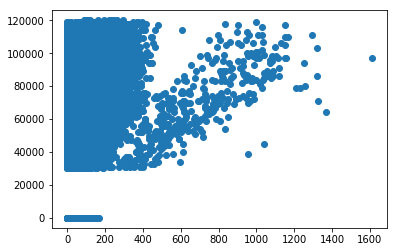

In [162]:
plt.scatter(buy_list2.amount,buy_list2.income)

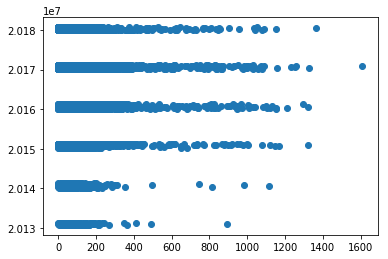

In [163]:
plt.scatter(buy_list2.amount,buy_list2.became_member_on)

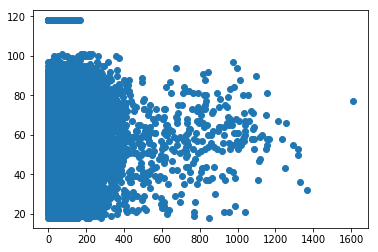

In [164]:
plt.scatter(buy_list2.amount,buy_list2.age)

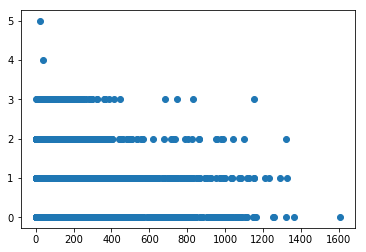

In [165]:
plt.scatter(buy_list2.amount,buy_list2.v_cnt_fafdcd668e3743c1bb461111dcafc2a4)

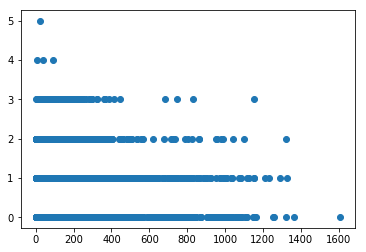

In [166]:
plt.scatter(buy_list2.amount,buy_list2.r_cnt_fafdcd668e3743c1bb461111dcafc2a4)

通过相关性和相关性的散点图，发现：

1. 收入对于购买量有显著的正相关性
2. 成为会员的时间和购买量也有显著相关性，越是新用户购买量越高
3. 年龄对于购买量没有显著相关性，各个年龄层的购买分布差不多
4. 提取了相关性最靠前2个推送对于购买量的散点图，发现并无特别显著的相关性。即时推送多次，也没有显著提高购买量，甚至只推送一次的购买量要大于推送多次。

目前仅仅从推送量来分析和购买量的关系，后续还需要进一步分析其他因素，如消费前的最后一次推送是什么，触发用户第一次购买的推送是哪个，不同的推送的频率方式对于购买行为的影响等等。

